# LMSF for Denoising of Signals and Images

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, data
from skimage.filters import threshold_niblack, threshold_sauvola

from lmsf import lmsf_1d, lmsf_2d, lmsf_2d_cumulative

### Auxiliary Functions

In [2]:
def plot_img(img, tlt='', cmp='gray'):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(3,3))
    fig.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.0, wspace=None, hspace=None)
    ax.imshow(img, cmap=cmp)
    ax.set_title(tlt)
    ax.axis('off')
    plt.show()

def fill_with_color(image, lmsf):
    img_temp = np.zeros((image.shape[0],image.shape[1],3), dtype='uint8')
    img_temp[:,:,0] = image
    img_temp[:,:,1] = image
    img_temp[:,:,2] = image
    mask_temp = lmsf == 0
    img_temp[mask_temp,2] = 191
    return img_temp

In [3]:
# Setting of the LMSF threshold parameter

t = 0.5

## LMSF Denoising of Low Levels of a Digital Signal

In [4]:
# A discrete signal samples

signal = np.array([1,1,1,1,1,0.75,0.5,0.25,0.05,0.1,0.25,0.5,0.75,1,1,1,1,1,0.85,
                   0.95,0.75,0.8,0.75,0.65,1,1,0.4,1,1,0.68,0.77,0.9,0.91,0.9,0.5,
                   0.9,1,1,1,1,1,1,0.9,0.86,0.8,0.4,0.78,0.87,0.95,1,1,1,1,1,0.9,
                   0.8,0.7,0.6,0.5,0.4,0.3,0.25,0.2,0.15,0.1,0.05,1,1,1,1,1], dtype='float64')

samples = range(0, len(signal))

In [5]:
# Setting of the LMSF averaging parameters

n_i = [2,5,20]

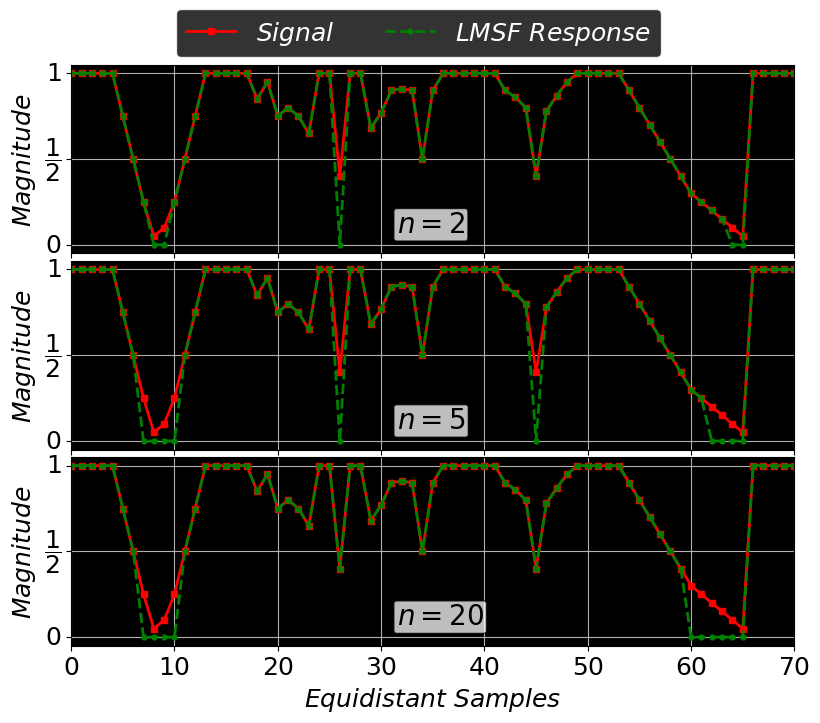

In [6]:
fig, ax = plt.subplots(nrows=len(n_i), ncols=1, figsize=(8,7))
fig.subplots_adjust(left=0.076, bottom=0.095, right=0.98, top=0.925, wspace=None, hspace=0.04)
for i in range(len(n_i)):
    filter_res = lmsf_1d(signal, n=n_i[i], t=t)
    ax[i].plot(samples, signal, marker='s', linewidth=2, markersize=5, color='red', ls='-')
    ax[i].plot(samples, filter_res, marker='.', linewidth=2, markersize=7, color='green', ls='--')
    ax[i].set_xlim(0.0, len(signal)-1)
    ax[i].set_ylim(-0.05, 1.05)    
    ax[i].tick_params(axis='both', which='major', labelsize=18)
    ax[i].set_xticks((0,10,20,30,40,50,60,70))
    if i == 0:
        ax[i].legend(('$Signal$','$LMSF~Response$'), loc=(0.145,1.04), fontsize=18, labelcolor='white', ncol=2, shadow=False, edgecolor='white', facecolor='black')
    if i != len(n_i)-1:
        ax[i].set_xticklabels((), fontdict={'verticalalignment':'top','horizontalalignment':'center'})
    else:
        ax[i].set_xticklabels(('$0$','$10$','$20$','$30$','$40$','$50$','$60$','$70$'), fontdict={'verticalalignment':'top','horizontalalignment':'center'})
        ax[i].set_xlabel('$Equidistant~Samples$', fontsize=18)
    ax[i].set_yticks((0, 0.5, 1))
    ax[i].set_yticklabels((r'$0$', r'$\dfrac{1}{2}$', r'$1$'), fontdict={'verticalalignment':'center','horizontalalignment':'right'})
    ax[i].set_ylabel('$Magnitude$', fontsize=18)
    ax[i].set_facecolor('#000000')
    ax[i].text(0.45, 0.08, '$n={0}$'.format(n_i[i]), transform=ax[i].transAxes, rotation=0,
            fontdict={'family':'serif', 'color':'black', 'weight':'bold', 'size':20},
            horizontalalignment='left', verticalalignment='bottom',
            bbox={'boxstyle':'round', 'facecolor':'white', 'alpha':0.75,'pad':0.1})
    ax[i].axis('on')
    ax[i].grid('on')
plt.show()

## LMSF Background Denoising of Grayscale Images

### 1. Processing of Fluorescence Image

In [7]:
# Open image

path_to_img = 'image_fragment.tif'
image = io.imread(path_to_img, plugin="tifffile")

In [8]:
# Setting of the range of values for LMSF averaging parameter

n_max = int(np.floor(np.min([image.shape[0], image.shape[1]])/2) - 1)
nn = [5,10,20,40,80,n_max]

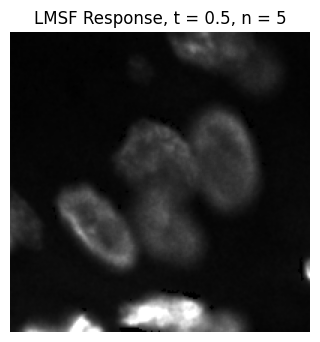

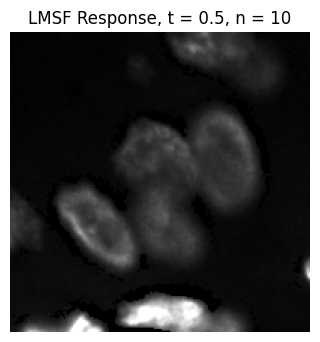

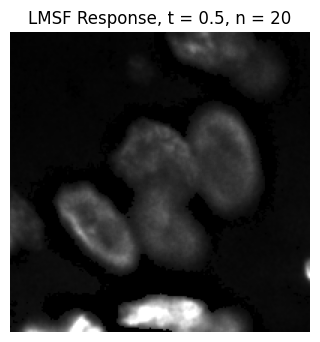

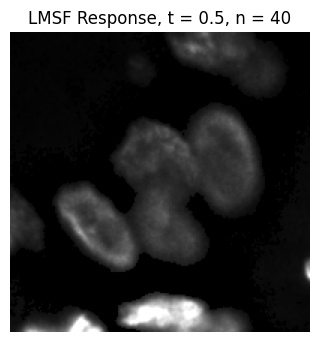

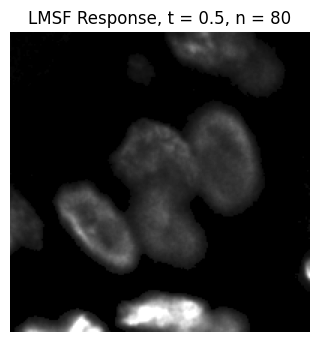

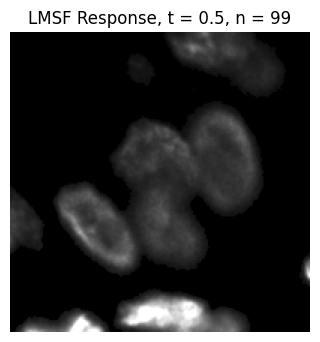

In [9]:
# LMSF processing of the image

image_lmsf = {}
i = 1
for n in nn:
    img_filtered = lmsf_2d(image, n=n, t=t)
    image_lmsf[i] = (n, img_filtered)
    i = i + 1
    plot_img(img_filtered, tlt='LMSF Response, t = {0}, n = {1}'.format(t, n))

img_filtered = lmsf_2d_cumulative(image, t=t, nn=nn)
image_lmsf['all'] = (nn, img_filtered)

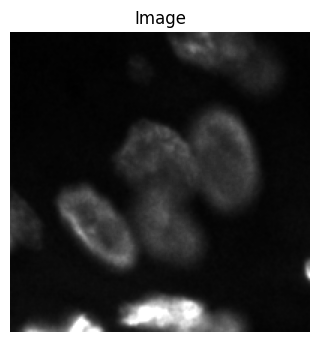

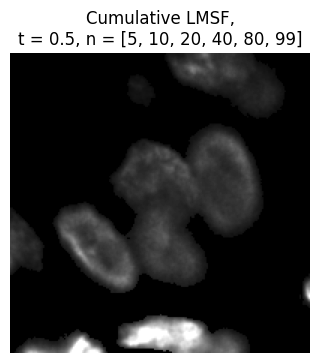

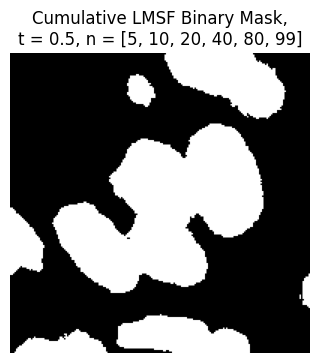

In [10]:
plot_img(image, tlt='Image')
plot_img(img_filtered, tlt='Cumulative LMSF,\nt = {0}, n = {1}'.format(t, nn))
plot_img(img_filtered>0, tlt='Cumulative LMSF Binary Mask,\nt = {0}, n = {1}'.format(t, nn))

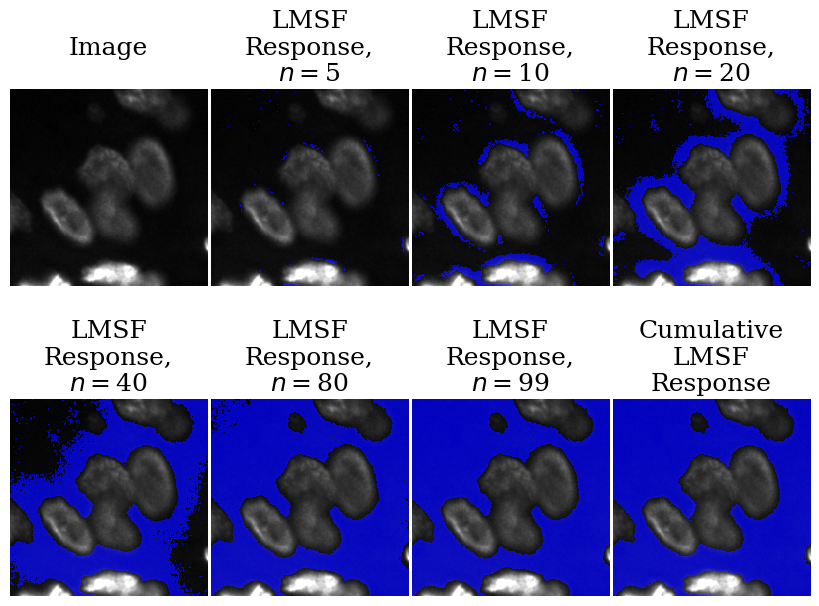

In [11]:
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(8,6.2))
fig.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0.02, hspace=0)
ax[0,0].imshow(image, cmap='gray', interpolation='nearest')
ax[0,0].set_title('Image\n',
                  fontdict={'family':'serif', 'color':'black', 'weight':'normal', 'size':18})
ax[0,0].axis('off')
ax[0,1].imshow(fill_with_color(image, image_lmsf[1][1]), cmap='gray', interpolation='nearest')
ax[0,1].set_title('LMSF\nResponse,\n$n=${0}'.format(nn[0]),
                  fontdict={'family':'serif', 'color':'black', 'weight':'normal', 'size':18})
ax[0,1].axis('off')
ax[0,2].imshow(fill_with_color(image, image_lmsf[2][1]), cmap='gray', interpolation='nearest')
ax[0,2].set_title('LMSF\nResponse,\n$n=${0}'.format(nn[1]),
                  fontdict={'family':'serif', 'color':'black', 'weight':'normal', 'size':18})
ax[0,2].axis('off')
ax[0,3].imshow(fill_with_color(image, image_lmsf[3][1]), cmap='gray', interpolation='nearest')
ax[0,3].set_title('LMSF\nResponse,\n$n=${0}'.format(nn[2]),
                  fontdict={'family':'serif', 'color':'black', 'weight':'normal', 'size':18})
ax[0,3].axis('off')
ax[1,0].imshow(fill_with_color(image, image_lmsf[4][1]), cmap='gray', interpolation='nearest')
ax[1,0].set_title('LMSF\nResponse,\n$n=${0}'.format(nn[3]),
                  fontdict={'family':'serif', 'color':'black', 'weight':'normal', 'size':18})
ax[1,0].axis('off')
ax[1,1].imshow(fill_with_color(image, image_lmsf[5][1]), cmap='gray', interpolation='nearest')
ax[1,1].set_title('LMSF\nResponse,\n$n=${0}'.format(nn[4]),
                  fontdict={'family':'serif', 'color':'black', 'weight':'normal', 'size':18})
ax[1,1].axis('off')
ax[1,2].imshow(fill_with_color(image, image_lmsf[6][1]), cmap='gray', interpolation='nearest')
ax[1,2].set_title('LMSF\nResponse,\n$n=${0}'.format(nn[5]),
                  fontdict={'family':'serif', 'color':'black', 'weight':'normal', 'size':18})
ax[1,2].axis('off')
ax[1,3].imshow(fill_with_color(image, image_lmsf['all'][1]), cmap='gray', interpolation='nearest')
ax[1,3].set_title('Cumulative\nLMSF\nResponse',
                  fontdict={'family':'serif', 'color':'black', 'weight':'normal', 'size':18})
ax[1,3].axis('off')
plt.show()

### 2. Processing of Cameraman

In [12]:
cameraman = data.camera()

In [13]:
nn_cameraman = [5,10,20,40,50,80,100,150,200,250]
cameraman_lmsf = lmsf_2d_cumulative(cameraman, t=t, nn=nn_cameraman)

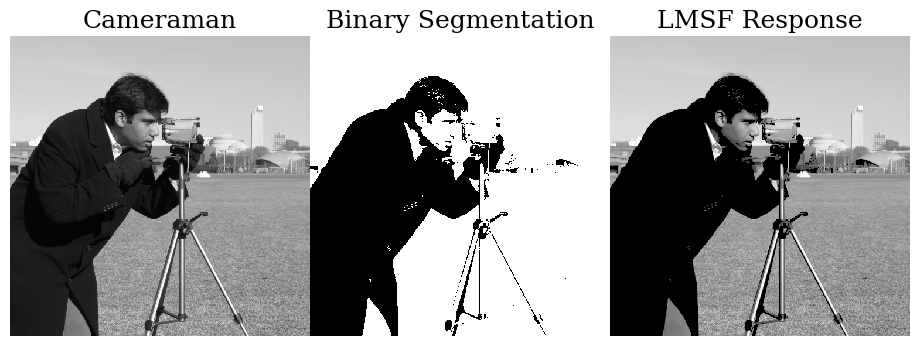

In [14]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(9,3))
fig.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0,hspace=None)
ax[0].imshow(cameraman, cmap='gray', interpolation='nearest')
ax[0].set_title('Cameraman', fontdict={'family':'serif', 'color':'black', 'weight':'normal', 'size':18})
ax[0].axis('off')
ax[1].imshow(cameraman_lmsf > 0, cmap='gray', interpolation='nearest')
ax[1].set_title('Binary Segmentation', fontdict={'family':'serif', 'color':'black', 'weight':'normal', 'size':18})
ax[1].axis('off')
ax[2].imshow(cameraman_lmsf, cmap='gray', interpolation='nearest')
ax[2].set_title('LMSF Response', fontdict={'family':'serif', 'color':'black', 'weight':'normal', 'size':18})
ax[2].axis('off')
plt.show()

### 3. Niblack, Sauvola, and LMSF Thresholding

In [15]:
page = data.page()

In [16]:
thresh_niblack = threshold_niblack(page, window_size=25, k=0.8)
thresh_sauvola = threshold_sauvola(page, window_size=25, k=0.2)

In [17]:
t_page = 0.65
nn_page = [20,50,95]
page_lmsf = lmsf_2d_cumulative(page, t=t_page, nn=nn_page)

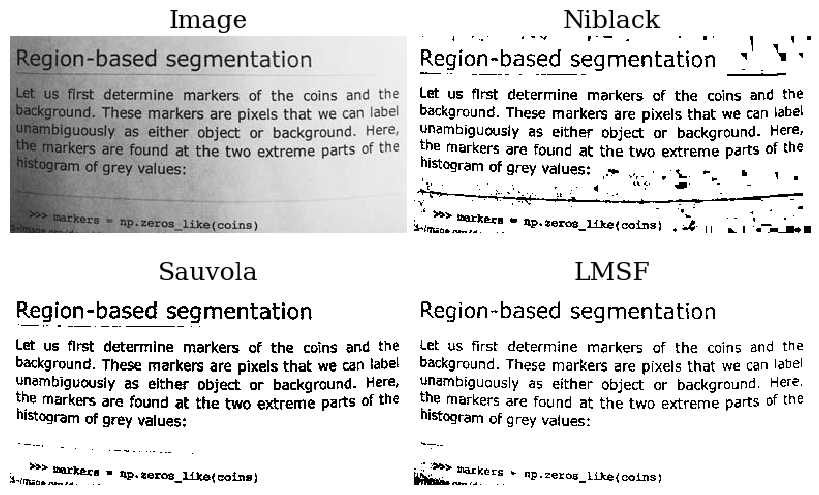

In [18]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8,5))
fig.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0.02, hspace=0.02)
ax[0,0].imshow(page, cmap='gray', interpolation='nearest')
ax[0,0].set_title('Image', fontdict={'family':'serif', 'color':'black', 'weight':'normal', 'size':18})
ax[0,0].axis('off')
ax[0,1].imshow(page > thresh_niblack, cmap='gray', interpolation='nearest')
ax[0,1].set_title('Niblack', fontdict={'family':'serif', 'color':'black', 'weight':'normal', 'size':18})
ax[0,1].axis('off')
ax[1,0].imshow(page > thresh_sauvola, cmap='gray', interpolation='nearest')
ax[1,0].set_title('Sauvola', fontdict={'family':'serif', 'color':'black', 'weight':'normal', 'size':18})
ax[1,0].axis('off')
ax[1,1].imshow(page_lmsf > 0, cmap='gray', interpolation='nearest')
ax[1,1].set_title('LMSF', fontdict={'family':'serif', 'color':'black', 'weight':'normal', 'size':18})
ax[1,1].axis('off')
plt.show()